In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import ntwktools as nt

In [87]:
df = pd.read_csv(r"C:\Users\fercy\OneDrive\Escritorio\InternadoFMM\Pruebas%20BCI\SeñalesProcesadas10Hz2\AndreaBosch\S1\PasivoPre.csv")
df.head()

HRV        RRV   EnvAnta    EnvAgo       Torque     Posicion  \
0  74.017528  22.783620  0.588737  0.218855 -1584.696021  6268.593097   
1  73.131593  22.397755  0.765104  0.369422 -1514.968138  6374.329999   
2  72.380155  22.005578  0.640025  0.335620 -1522.119476  6379.399931   
3  71.752686  21.607859  0.723298  0.343235 -1520.057000  6384.821454   
4  71.238659  21.205365  0.672644  0.377219 -1530.812046  6387.034919   

   Binaria  alfa_FC3    mu_FC3  beta_FC3  ...   beta_O1  gamma_O1   alfa_Oz  \
0      0.0  0.035565  0.040836  0.213854  ...  0.306258  0.149907  0.019754   
1      0.0  0.030308  0.038415  0.175029  ...  0.307820  0.135587  0.035809   
2      0.0  0.028432  0.040616  0.177118  ...  0.316565  0.129396  0.048042   
3      0.0  0.028100  0.042140  0.184897  ...  0.326730  0.122141  0.056104   
4      0.0  0.029955  0.048230  0.201014  ...  0.309053  0.108130  0.059359   

      mu_Oz   beta_Oz  gamma_Oz   alfa_O2     mu_O2   beta_O2  gamma_O2  
0  0.132519  0.262150  0.093709  0.024803  0.105890  0.212172  0.089092  
1  0.117528  0.276142  0.083686  0.039610  0.091056  0.230793  0.079543  
2  0.112484  0.281947  0.079996  0.051291  0.086899  0.243913  0.077453  
3  0.118593  0.283294  0.081488  0.061627  0.095035  0.253893  0.081206  
4  0.114038  0.255087  0.078578  0.065300  0.090695  0.217830  0.075072  

[5 rows x 71 columns]

(4112,)


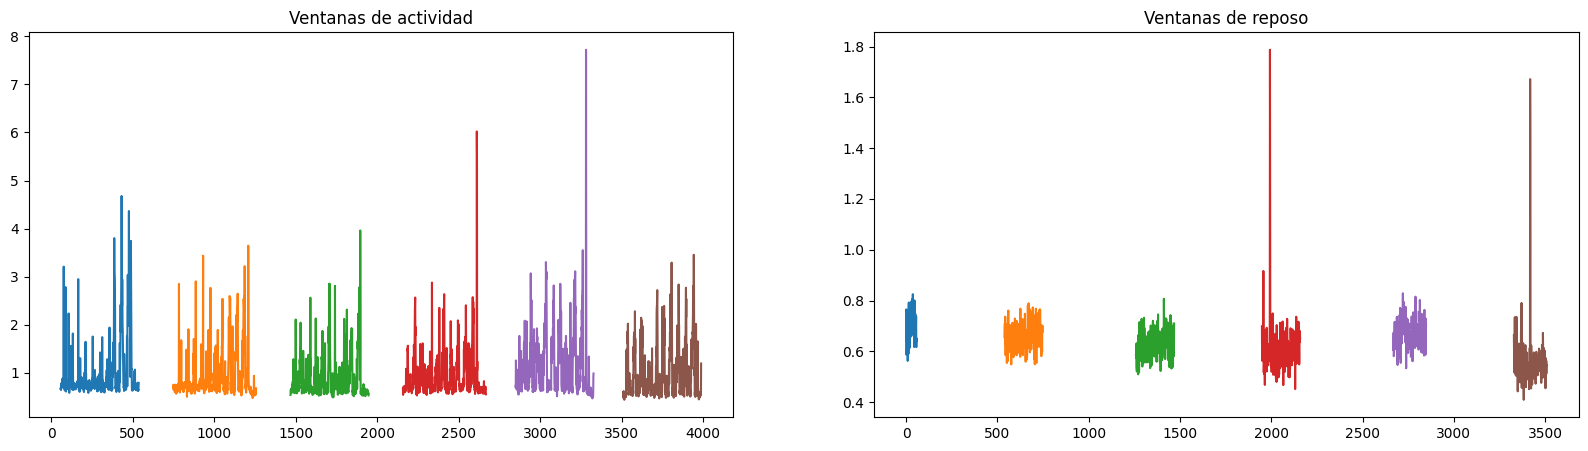

In [88]:
act, rep = nt.obtener_win(df.EnvAnta, df.Binaria)

In [89]:
# Seleccion de ventanas buenas

def selecciona_ventanas(act, rep, fs = 10, win_len = 15, siPlot = False, signal = None):
    '''
    Selecciona las ventanas de actividad y reposo que tengan una duración mayor o igual a win_len
    act: lista con los indices de las ventanas de actividad
    rep: lista con los indices de las ventanas de reposo
    fs: frecuencia de muestreo
    win_len: duración mínima de las ventanas en segundos
    siPlot: si se quiere graficar las ventanas seleccionadas
    signal: señal de la cual se obtuvieron las ventanas
    '''
    new_act = []
    new_rep = []
    win_len = win_len * fs
    for index_act, index_rep in zip(act, rep):
        start_act, end_act = index_act
        start_rep, end_rep = index_rep

        if end_act - start_act >= win_len:
            start_act = start_act + (end_act - start_act - win_len) // 2
            end_act = start_act + win_len
            new_act.append((start_act, end_act))
            if siPlot:
                if signal is None:
                    raise ValueError("signal is needed for plotting")
                plt.plot(signal[start_act:end_act])
                

        if end_rep - start_rep >= win_len:
            start_rep = start_rep + (end_rep - start_rep - win_len) // 2
            end_rep = start_rep + win_len
            new_rep.append((start_rep, end_rep))
            if siPlot:
                if signal is None:
                    raise ValueError("signal is needed for plotting")
                plt.plot(signal[start_rep:end_rep])
        
        
    return new_act, new_rep

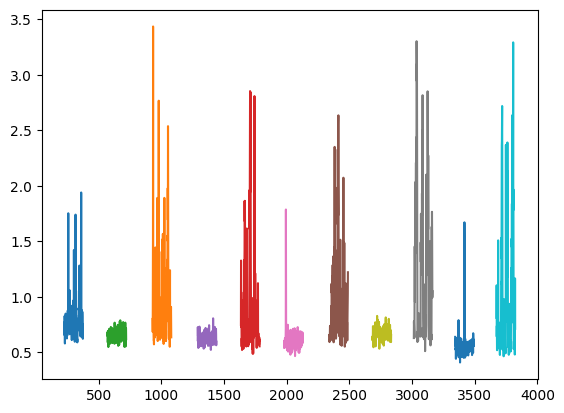

In [90]:
act, rep = selecciona_ventanas(act, rep, siPlot = True, signal = df.EnvAnta)

In [91]:
import plotly.graph_objects as go

def plot_3d_animation(bands, channels, band_index, temp_signals, act_start, act_end, rep_start, rep_end):
    fig = go.Figure()

    # Add the first line with comet effect
    fig.add_trace(go.Scatter3d(
        x=temp_signals[bands[band_index] + channels[band_index][0]][act_start:act_end],
        y=temp_signals[bands[band_index] + channels[band_index][1]][act_start:act_end],
        z=temp_signals[bands[band_index] + channels[band_index][2]][act_start:act_end],
        mode='lines+markers',
        name='Actividad',
        marker=dict(
            size=4,
            color='blue',
            opacity=0.5
        ),
        line=dict(
            color='blue',
            width=2
        )
    ))

    # Add the second line with comet effect
    fig.add_trace(go.Scatter3d(
        x=temp_signals[bands[band_index] + channels[band_index][0]][rep_start:rep_end],
        y=temp_signals[bands[band_index] + channels[band_index][1]][rep_start:rep_end],
        z=temp_signals[bands[band_index] + channels[band_index][2]][rep_start:rep_end],
        mode='lines+markers',
        name='Reposo',
        marker=dict(
            size=4,
            color='red',
            opacity=0.5
        ),
        line=dict(
            color='red',
            width=2
        )
    ))

    # Create frames for animation
    frames = [go.Frame(data=[
        go.Scatter3d(
            x=temp_signals[bands[band_index] + channels[band_index][0]][act_start:act_start + k + 1],
            y=temp_signals[bands[band_index] + channels[band_index][1]][act_start:act_start + k + 1],
            z=temp_signals[bands[band_index] + channels[band_index][2]][act_start:act_start + k + 1],
            mode='lines+markers',
            marker=dict(
                size=4,
                color='blue',
                opacity=0.8
            ),
            line=dict(
                color='blue',
                width=2
            )
        ),
        go.Scatter3d(
            x=temp_signals[bands[band_index] + channels[band_index][0]][rep_start:rep_start + k + 1],
            y=temp_signals[bands[band_index] + channels[band_index][1]][rep_start:rep_start + k + 1],
            z=temp_signals[bands[band_index] + channels[band_index][2]][rep_start:rep_start + k + 1],
            mode='lines+markers',
            marker=dict(
                size=4,
                color='red',
                opacity=0.8
            ),
            line=dict(
                color='red',
                width=2
            )
        )
    ]) for k in range(min(act_end - act_start, rep_end - rep_start))]

    # Add frames to the figure
    fig.frames = frames

    # Update layout with animation settings
    fig.update_layout(
        title=f'{bands[band_index][:-1]} Output Degree Centrality System',
        scene=dict(
            xaxis_title=f'{bands[band_index]} {channels[band_index][0]}',
            yaxis_title=f'{bands[band_index]} {channels[band_index][1]}',
            zaxis_title=f'{bands[band_index]} {channels[band_index][2]}',
        ),
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                        method='animate',
                        args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)])]
        )]
    )

    # Show the plot
    fig.show()

# Recurrence on output degree centrality

In [92]:
bands = ["mu_", "beta_", "gamma_"]

channels = [["Cz", "C1", "C2", "P3"],
            ["FCz", "Oz", "P3", "CP4"],
            ["C1", "C2", "P4", "O2"]]



In [93]:
mu_signals = df[["mu_" + channel for channel in channels[0]]]
beta_signals = df[["beta_" + channel for channel in channels[1]]]
gamma_signals = df[["gamma_" + channel for channel in channels[2]]]

In [94]:
gamma_signals

gamma_C1  gamma_C2  gamma_P4  gamma_O2
0     0.175845  0.160261  0.077776  0.089092
1     0.136045  0.158907  0.074344  0.079543
2     0.109922  0.167451  0.073257  0.077453
3     0.095651  0.189850  0.078990  0.081206
4     0.091390  0.200384  0.087728  0.075072
...        ...       ...       ...       ...
4107  0.235349  0.287134  0.133132  0.149514
4108  0.223274  0.306351  0.112161  0.131814
4109  0.234426  0.306240  0.101499  0.110871
4110  0.257742  0.268734  0.096156  0.092349
4111  0.273888  0.228446  0.083852  0.081007

[4112 rows x 4 columns]

In [95]:

band_index = 1
temp_signals = beta_signals
act_start, act_end = act[2]
rep_start, rep_end = rep[2]
plot_3d_animation(bands, channels,  band_index, temp_signals, act_start, act_end, rep_start, rep_end)

In [96]:
from pyunicorn.timeseries import RecurrencePlot


Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


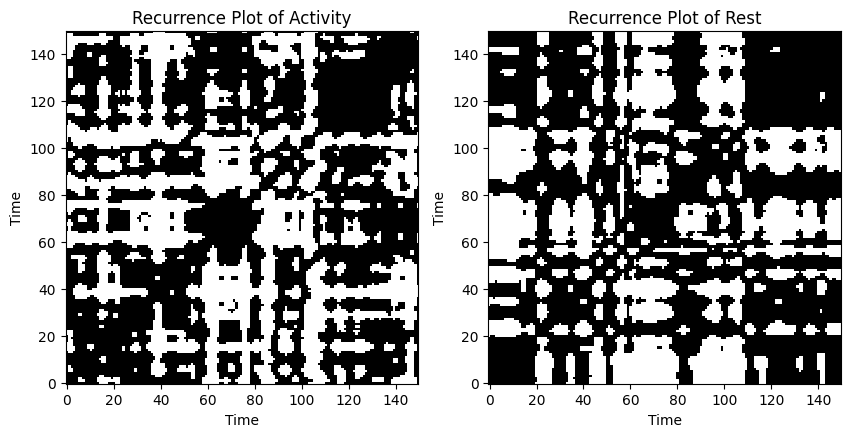

In [97]:
A_signals = np.array(beta_signals[act_start:act_end])
R_signals = np.array(beta_signals[rep_start:rep_end])

e = A_signals.std() * 2 

rp_A = RecurrencePlot(A_signals, threshold=e, tau=1, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(R_signals, threshold=e, tau=1, epsilon='distance', metric='euclidean')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()

# Recurrence of Input Degree System

In [98]:
bands = ["mu_", "beta_", "gamma_"]

channels = [["C3", "CP3", "C1", "Pz", "Oz", "C4", "CP4"],
            ["Oz", "C3", "P3", "FC4"],
            ["CP3", "P3", "C3", "C4", "C2", "P4"]]

In [99]:
mu_signals = df[["mu_" + channel for channel in channels[0]]]
beta_signals = df[["beta_" + channel for channel in channels[1]]]
gamma_signals = df[["gamma_" + channel for channel in channels[2]]]

In [100]:

band_index = 0
temp_signals = mu_signals
act_start, act_end = act[2]
rep_start, rep_end = rep[2]
plot_3d_animation(bands, channels,  band_index, temp_signals, act_start, act_end, rep_start, rep_end)

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


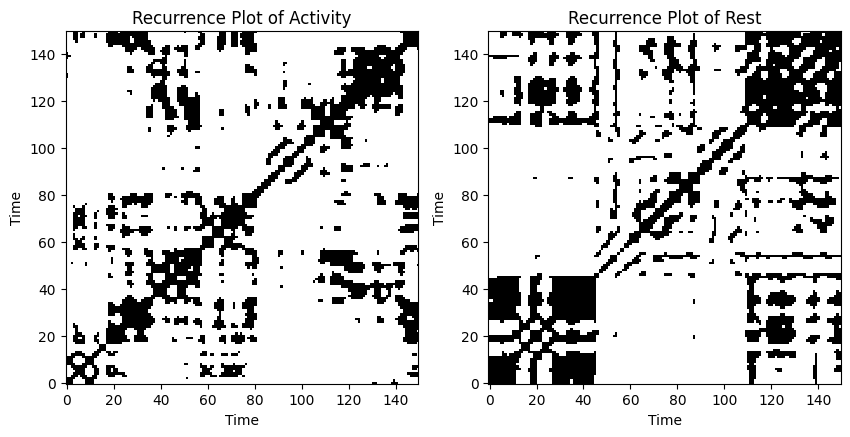

In [101]:
A_signals = np.array(mu_signals[act_start:act_end])
R_signals = np.array(mu_signals[rep_start:rep_end])

e = A_signals.std() * 2

rp_A = RecurrencePlot(A_signals, threshold=e, tau=1, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(R_signals, threshold=e, tau=1, epsilon='distance', metric='euclidean')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()

# Betweenness System

In [102]:
bands = ["mu_", "beta_", "gamma_"]

channels = [["FC4", "Pz", "FCz", "C2"],
            ["Cz", "O2"],
            ["C2", "FC4", "CP3"]]

mu_signals = df[["mu_" + channel for channel in channels[0]]]
beta_signals = df[["beta_" + channel for channel in channels[1]]]
gamma_signals = df[["gamma_" + channel for channel in channels[2]]]

In [103]:
band_index = 2
temp_signals = gamma_signals
act_start, act_end = act[2]
rep_start, rep_end = rep[2]
plot_3d_animation(bands, channels,  band_index, temp_signals, act_start, act_end, rep_start, rep_end)

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


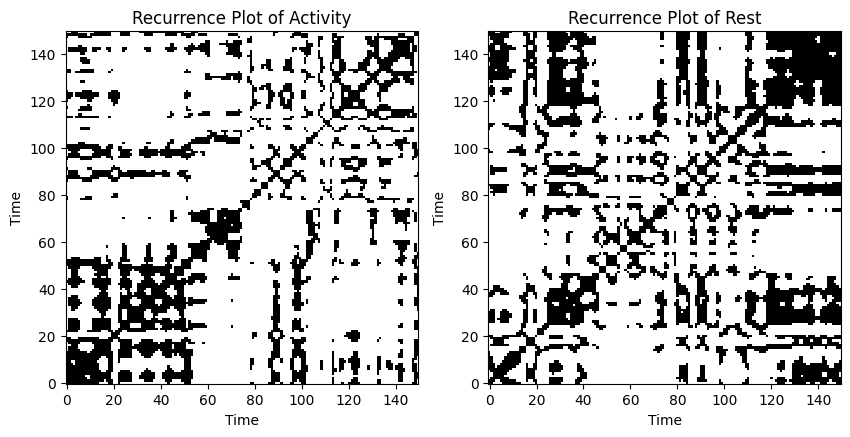

In [104]:
A_signals = np.array(beta_signals[act_start:act_end])
R_signals = np.array(beta_signals[rep_start:rep_end])

e = A_signals.std() * 1

rp_A = RecurrencePlot(A_signals, threshold=e, tau=5, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(R_signals, threshold=e, tau=5, epsilon='distance', metric='euclidean')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()

In [105]:
bands = ["mu_", "beta_", "gamma_"]

channels = [["C2", "C1", "FCz", "Cz", "Pz"],
            ["Cz", "Oz", "C3", "FCz", "P3"],
            ["C3", "FC4", "CP3", "P4"]]

mu_signals = df[["mu_" + channel for channel in channels[0]]]
beta_signals = df[["beta_" + channel for channel in channels[1]]]
gamma_signals = df[["gamma_" + channel for channel in channels[2]]]

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


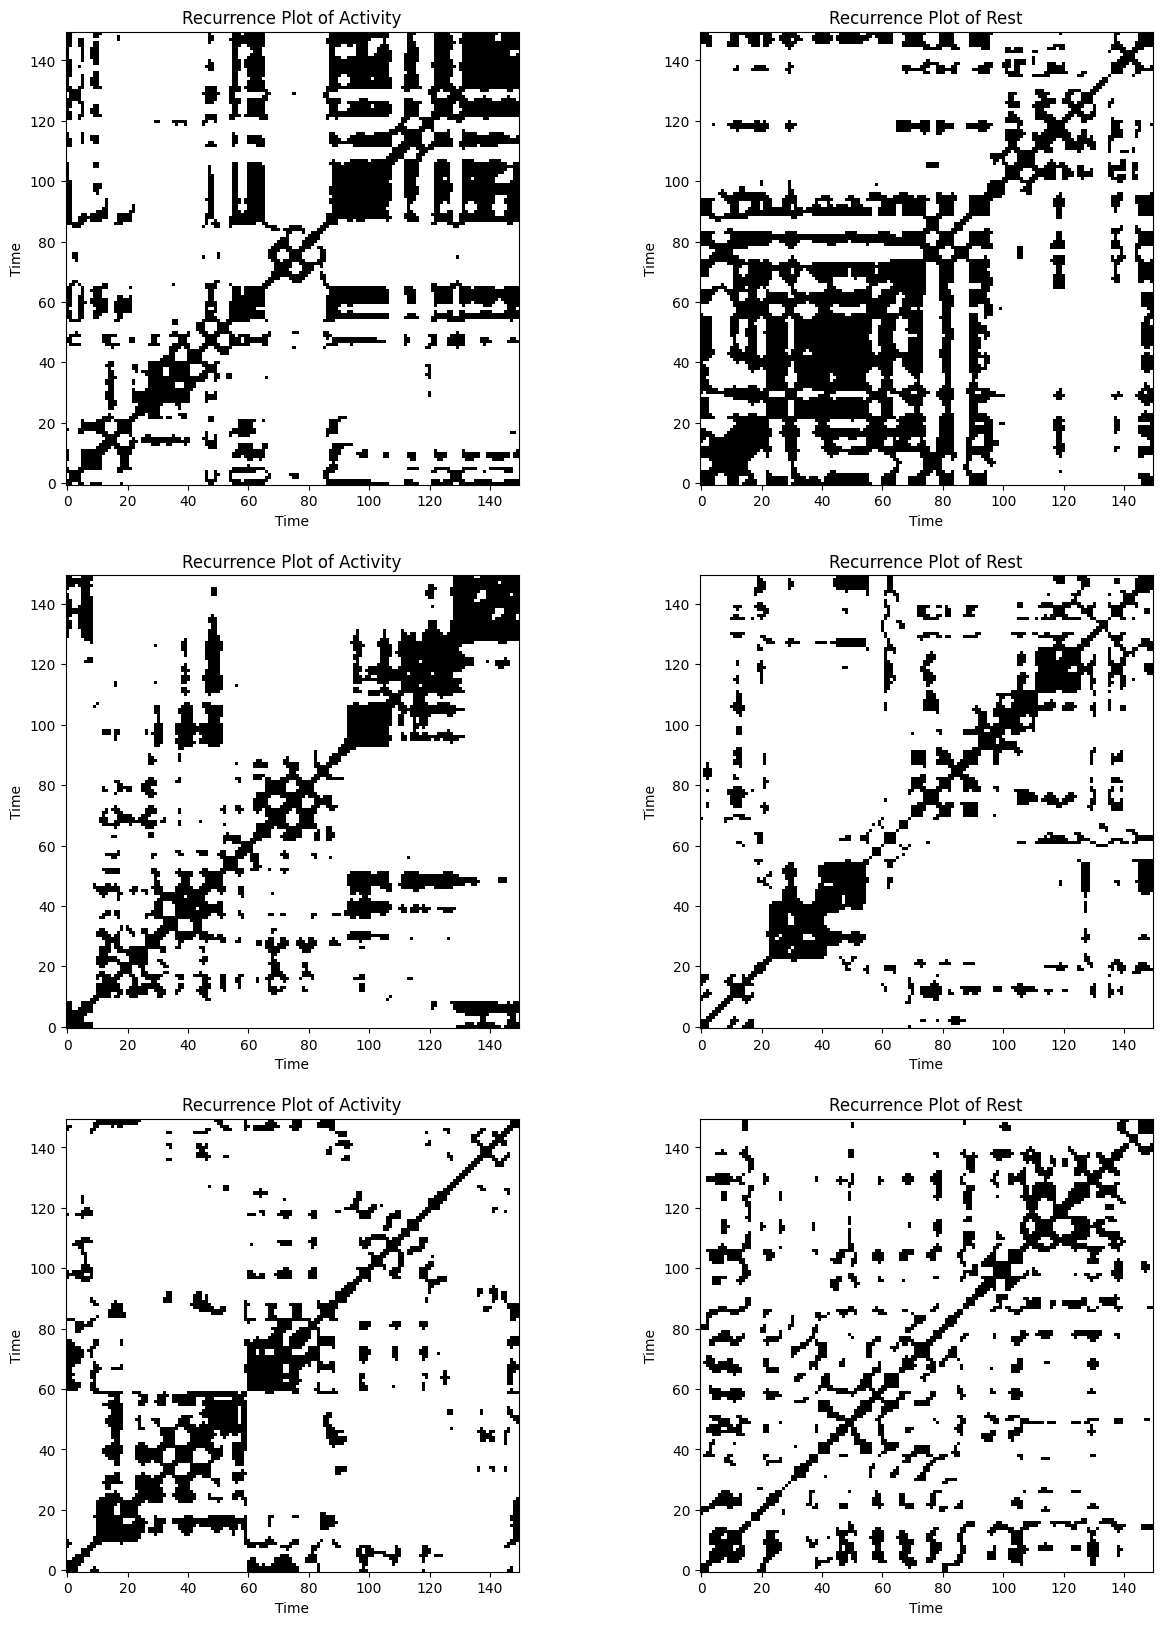

In [111]:
act_start, act_end = act[3]
rep_start, rep_end = rep[3]

act_mu_rp = np.array(mu_signals[act_start:act_end])
rep_mu_rp = np.array(mu_signals[rep_start:rep_end])

e = A_signals.std() * 1.5

rp_A = RecurrencePlot(act_mu_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(rep_mu_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')

plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(3, 2, 2)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')

act_beta_rp = np.array(beta_signals[act_start:act_end])
rep_beta_rp = np.array(beta_signals[rep_start:rep_end])

e = A_signals.std() * 2

rp_A = RecurrencePlot(act_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(rep_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')


plt.subplot(3, 2, 3)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(3, 2, 4)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')

act_beta_rp = np.array(gamma_signals[act_start:act_end])
rep_beta_rp = np.array(gamma_signals[rep_start:rep_end])

e = A_signals.std() * 1

rp_A = RecurrencePlot(act_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(rep_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')


plt.subplot(3, 2, 5)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(3, 2, 6)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')


plt.show()

In [107]:
%matplotlib inline

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


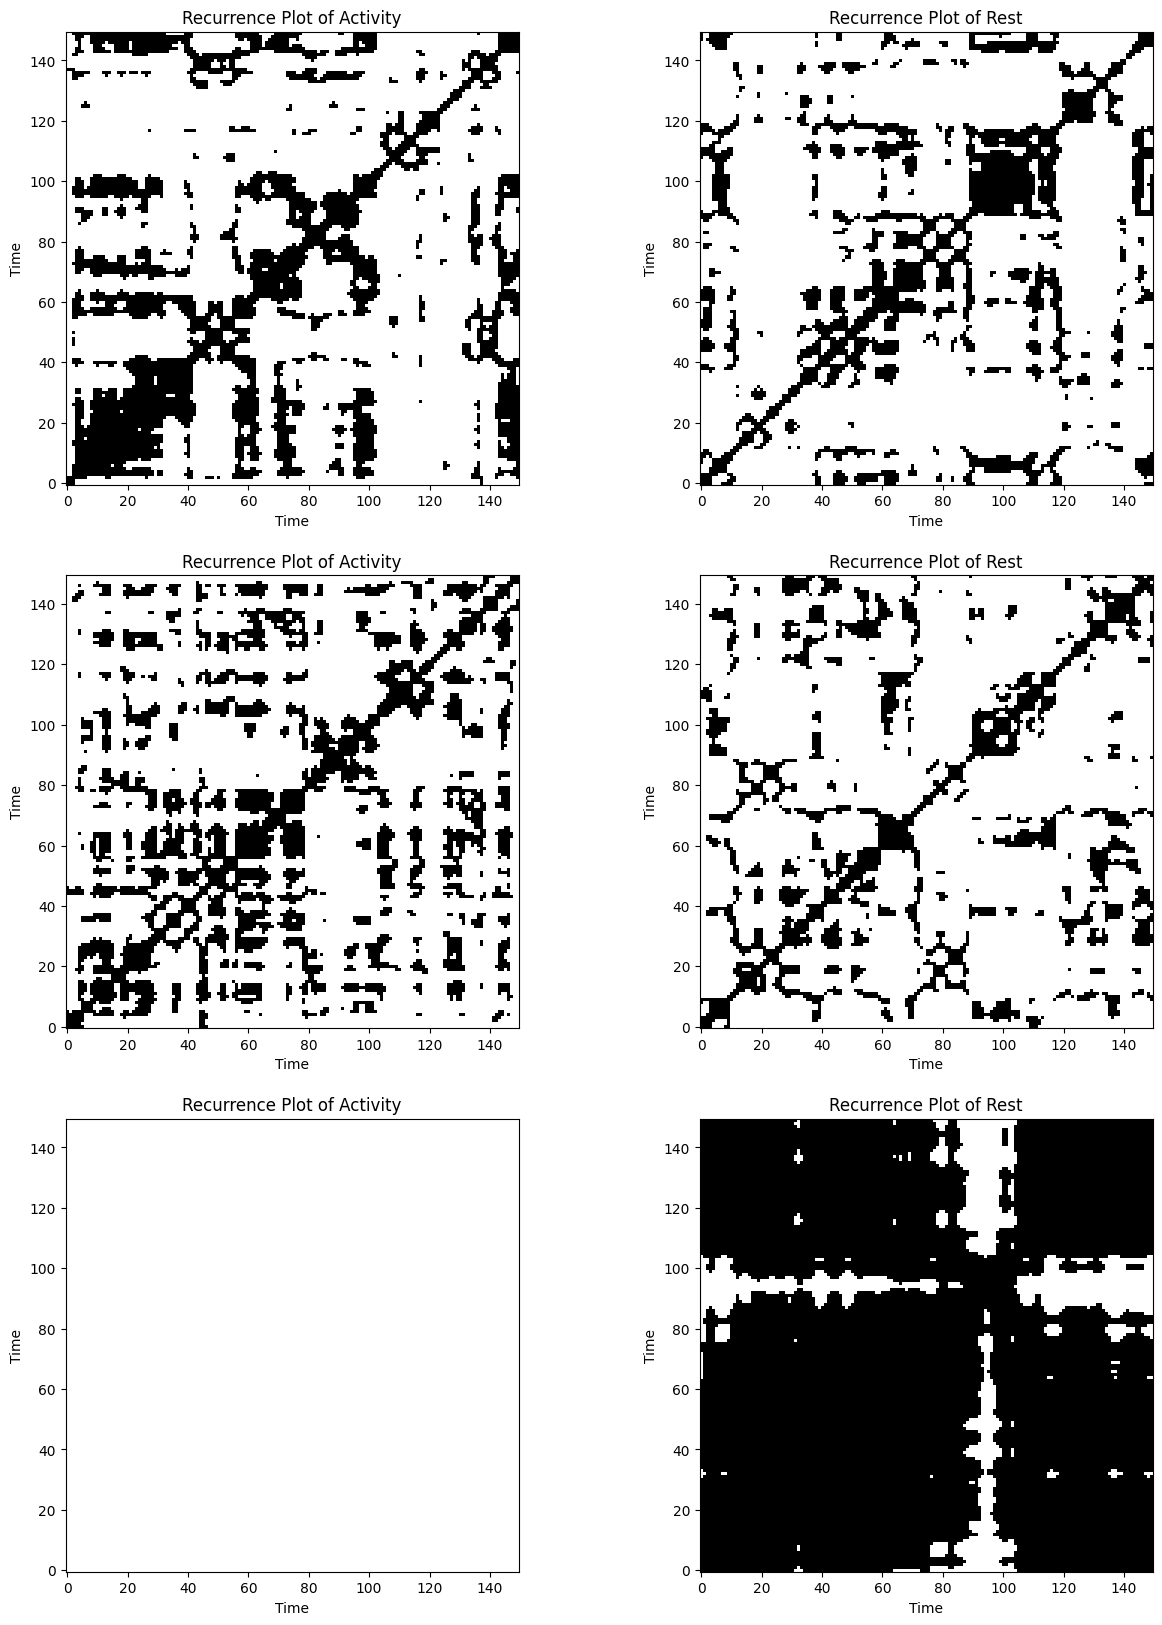

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


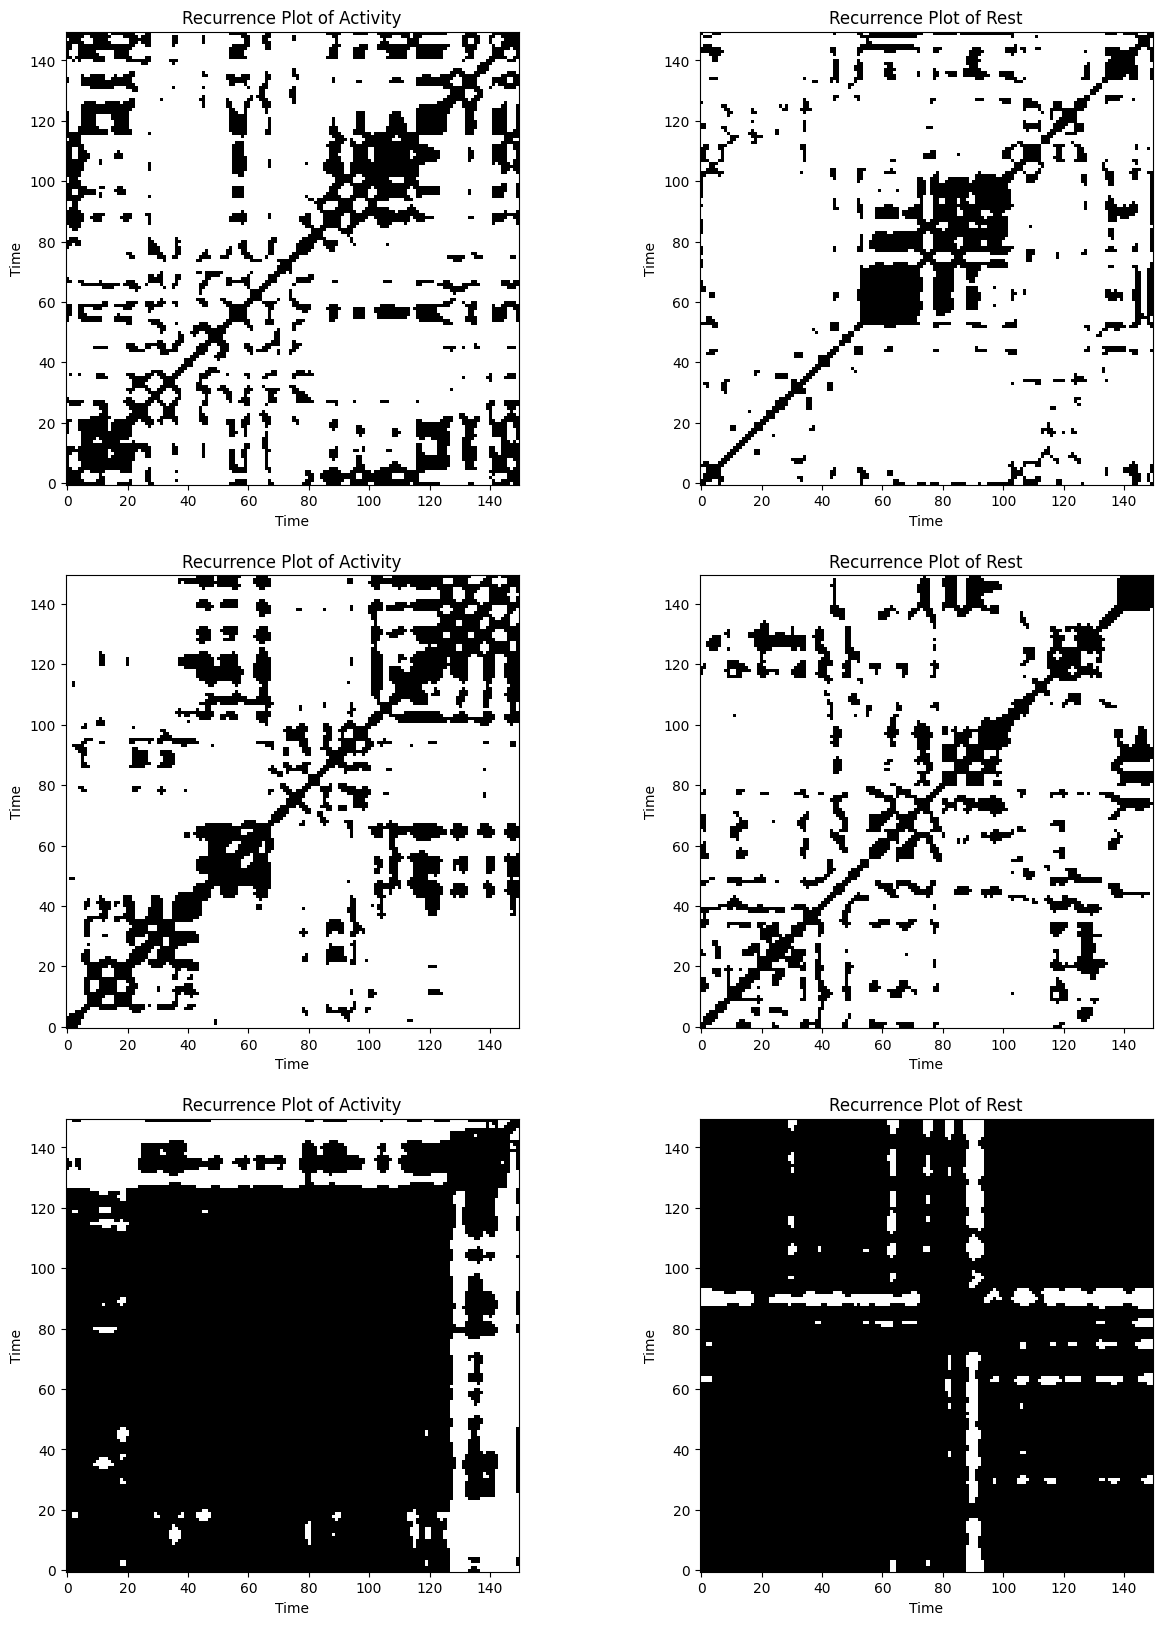

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


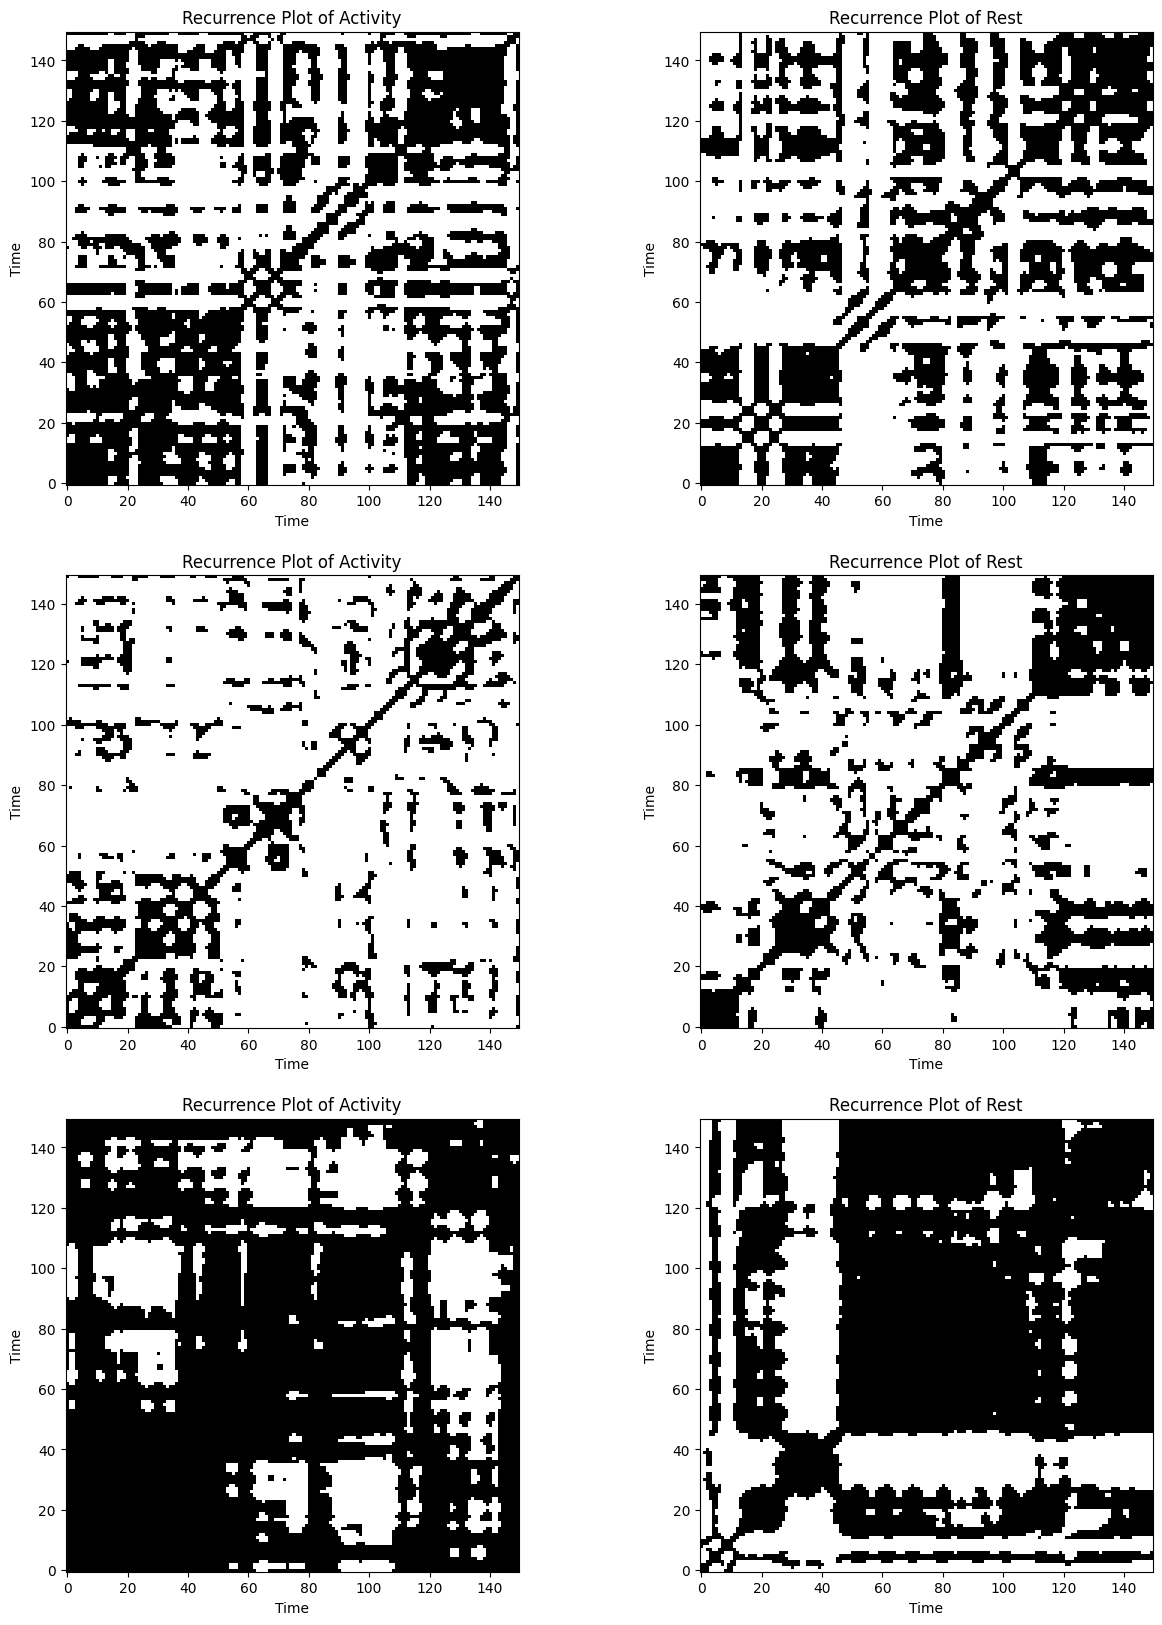

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


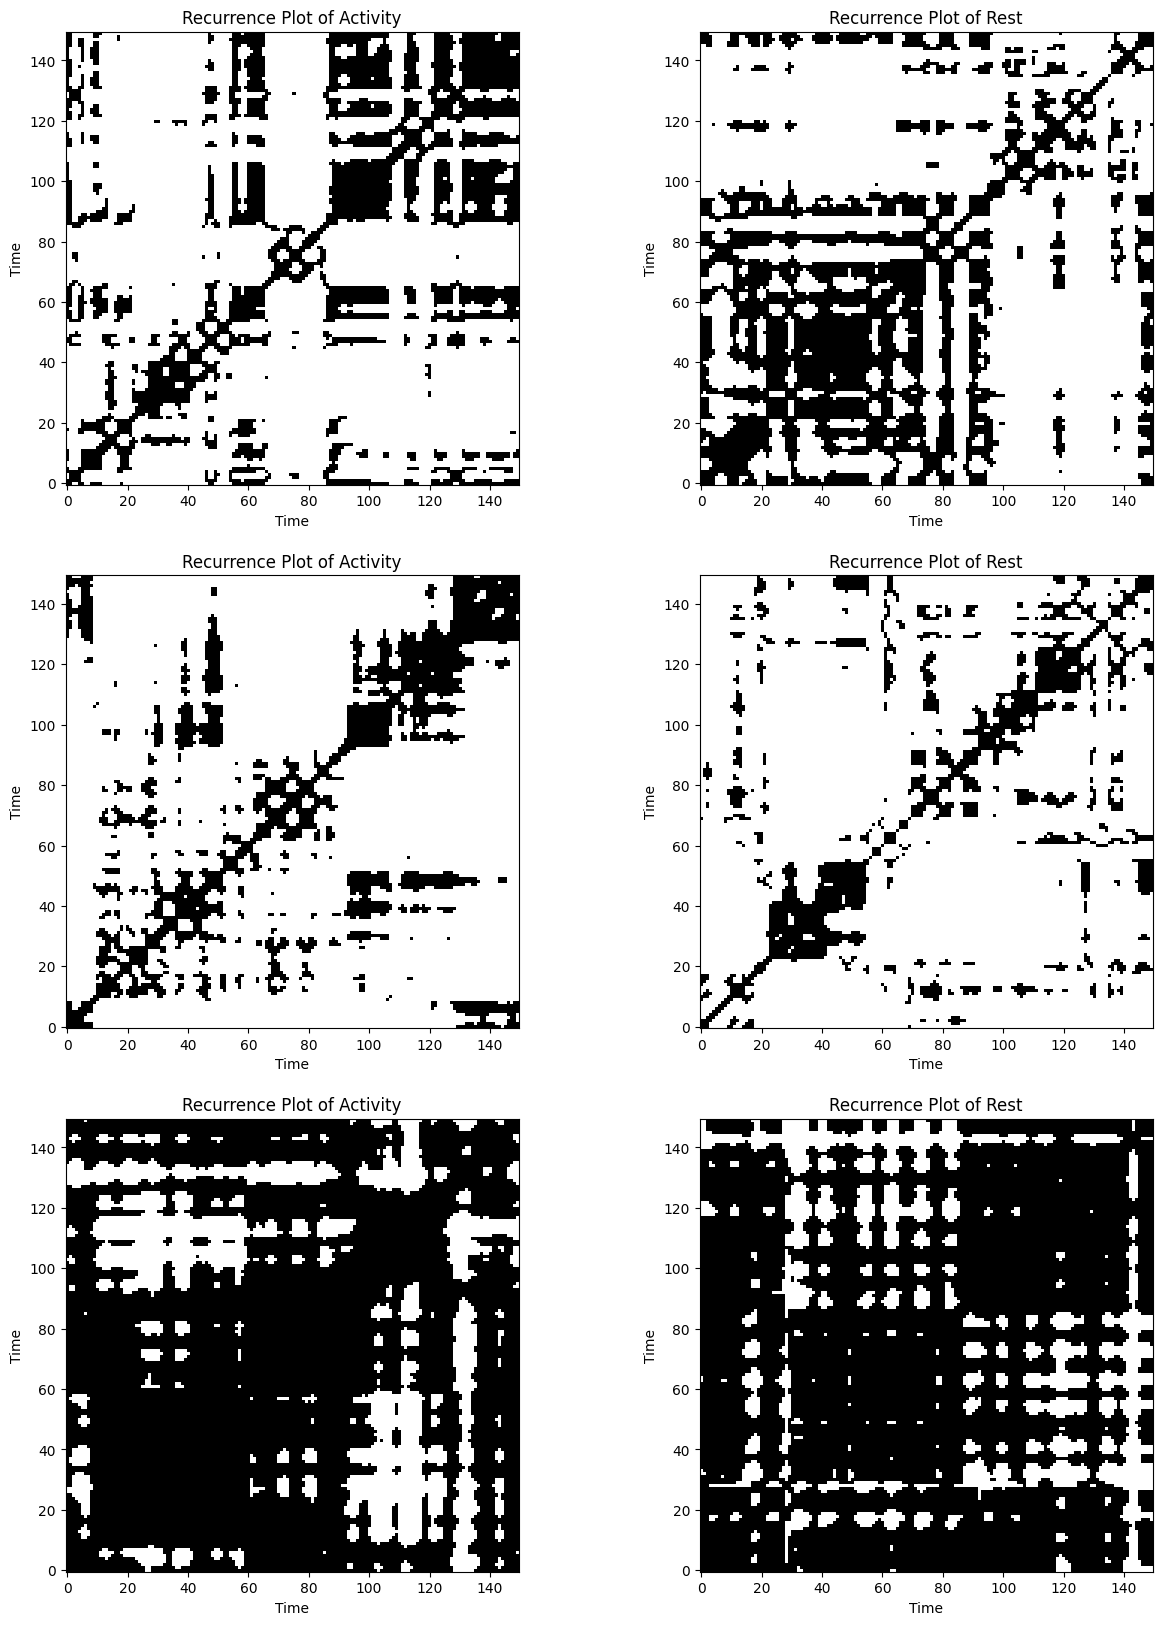

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


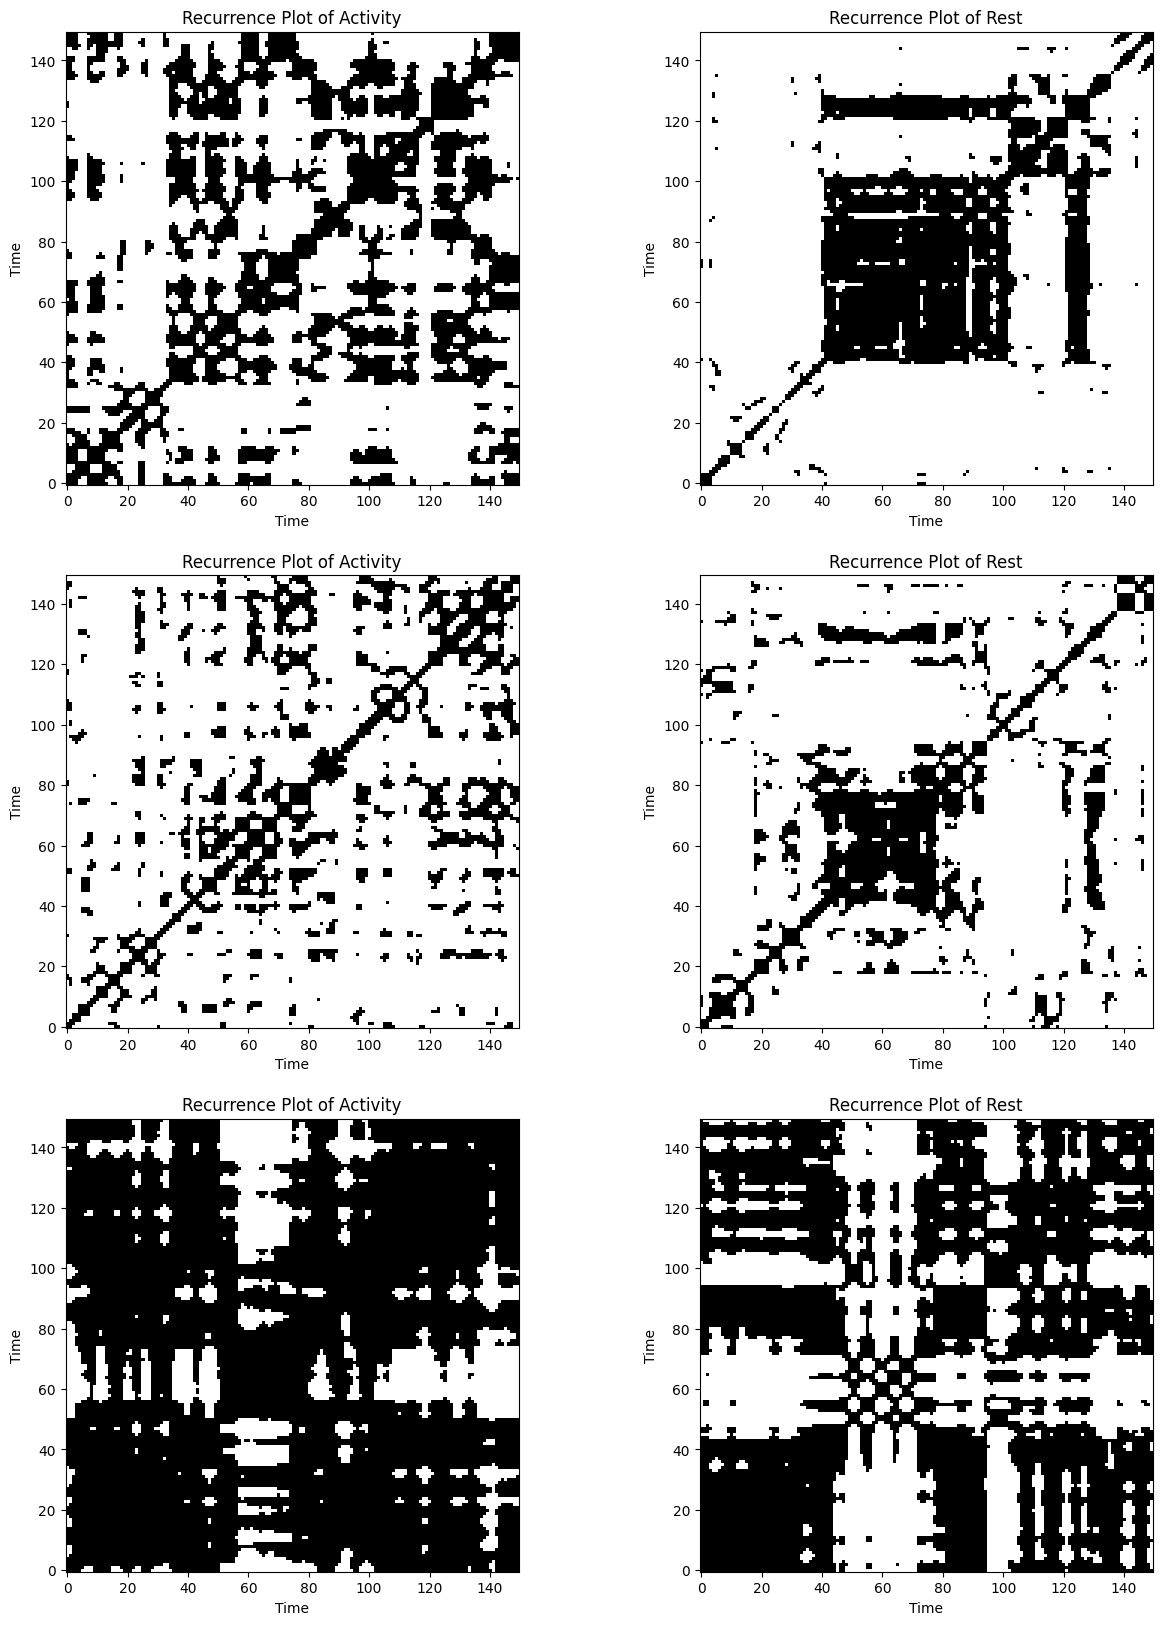

In [108]:
for act_index, rep_index in zip(act, rep):
    act_start, act_end = act_index
    rep_start, rep_end = rep_index
    #act_start, act_end = act[3]
    #rep_start, rep_end = rep[3]

    act_mu_rp = np.array(mu_signals[act_start:act_end])
    rep_mu_rp = np.array(mu_signals[rep_start:rep_end])

    e = A_signals.std() * 1.5

    rp_A = RecurrencePlot(act_mu_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
    rp_R = RecurrencePlot(rep_mu_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')

    plt.figure(figsize=(15, 20))
    plt.subplot(3, 2, 1)
    plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Activity')
    plt.xlabel('Time')
    plt.ylabel('Time')

    plt.subplot(3, 2, 2)
    plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Rest')
    plt.xlabel('Time')
    plt.ylabel('Time')

    act_beta_rp = np.array(beta_signals[act_start:act_end])
    rep_beta_rp = np.array(beta_signals[rep_start:rep_end])

    e = A_signals.std() * 2

    rp_A = RecurrencePlot(act_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
    rp_R = RecurrencePlot(rep_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')


    plt.subplot(3, 2, 3)
    plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Activity')
    plt.xlabel('Time')
    plt.ylabel('Time')

    plt.subplot(3, 2, 4)
    plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Rest')
    plt.xlabel('Time')
    plt.ylabel('Time')

    act_beta_rp = np.array(gamma_signals[act_start:act_end])
    rep_beta_rp = np.array(gamma_signals[rep_start:rep_end])

    e = A_signals.std() * 2.5

    rp_A = RecurrencePlot(act_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
    rp_R = RecurrencePlot(rep_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')


    plt.subplot(3, 2, 5)
    plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Activity')
    plt.xlabel('Time')
    plt.ylabel('Time')

    plt.subplot(3, 2, 6)
    plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Rest')
    plt.xlabel('Time')
    plt.ylabel('Time')


    plt.show()

In [109]:
results_mu = []
results_beta = []
results_gamma = []

# Iterar sobre los índices de actividad y reposo
for act_index, rep_index in zip(act, rep):
    act_start, act_end = act_index
    rep_start, rep_end = rep_index

    # Procesar señales mu
    act_mu_rp = np.array(mu_signals[act_start:act_end])
    rep_mu_rp = np.array(mu_signals[rep_start:rep_end])

    e = A_signals.std() * 0.7

    rp_A_mu = RecurrencePlot(act_mu_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
    rp_R_mu = RecurrencePlot(rep_mu_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')

    act_beta_rp = np.array(beta_signals[act_start:act_end])
    rep_beta_rp = np.array(beta_signals[rep_start:rep_end])

    e = A_signals.std() * 2

    rp_A_beta = RecurrencePlot(act_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
    rp_R_beta = RecurrencePlot(rep_beta_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')

    act_gamma_rp = np.array(gamma_signals[act_start:act_end])
    rep_gamma_rp = np.array(gamma_signals[rep_start:rep_end])

    e = A_signals.std() * 1.5

    rp_A_gamma = RecurrencePlot(act_gamma_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')
    rp_R_gamma = RecurrencePlot(rep_gamma_rp, threshold=e, tau=1, epsilon='distance', metric='euclidean')


    # Calcular métricas y agregar a las listas de resultados
    results_mu.append({
        'label': 'act_mu',
        'RR': rp_A_mu.recurrence_rate(),
        'DET': rp_A_mu.determinism(),
        'LAM': rp_A_mu.laminarity(),
        'TT': rp_A_mu.trapping_time()
    })
    results_mu.append({
        'label': 'rep_mu',
        'RR': rp_R_mu.recurrence_rate(),
        'DET': rp_R_mu.determinism(),
        'LAM': rp_R_mu.laminarity(),
        'TT': rp_R_mu.trapping_time()
    })

    results_beta.append({
        'label': 'act_beta',
        'RR': rp_A_beta.recurrence_rate(),
        'DET': rp_A_beta.determinism(),
        'LAM': rp_A_beta.laminarity(),
        'TT': rp_A_beta.trapping_time()
    })
    results_beta.append({
        'label': 'rep_beta',
        'RR': rp_R_beta.recurrence_rate(),
        'DET': rp_R_beta.determinism(),
        'LAM': rp_R_beta.laminarity(),
        'TT': rp_R_beta.trapping_time()
    })

    results_gamma.append({
        'label': 'act_gamma',
        'RR': rp_A_gamma.recurrence_rate(),
        'DET': rp_A_gamma.determinism(),
        'LAM': rp_A_gamma.laminarity(),
        'TT': rp_A_gamma.trapping_time()
    })
    results_gamma.append({
        'label': 'rep_gamma',
        'RR': rp_R_gamma.recurrence_rate(),
        'DET': rp_R_gamma.determinism(),
        'LAM': rp_R_gamma.laminarity(),
        'TT': rp_R_gamma.trapping_time()
    })

# Crear DataFrames con los resultados
df_results_mu = pd.DataFrame(results_mu)
df_results_beta = pd.DataFrame(results_beta)
df_results_gamma = pd.DataFrame(results_gamma)

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...


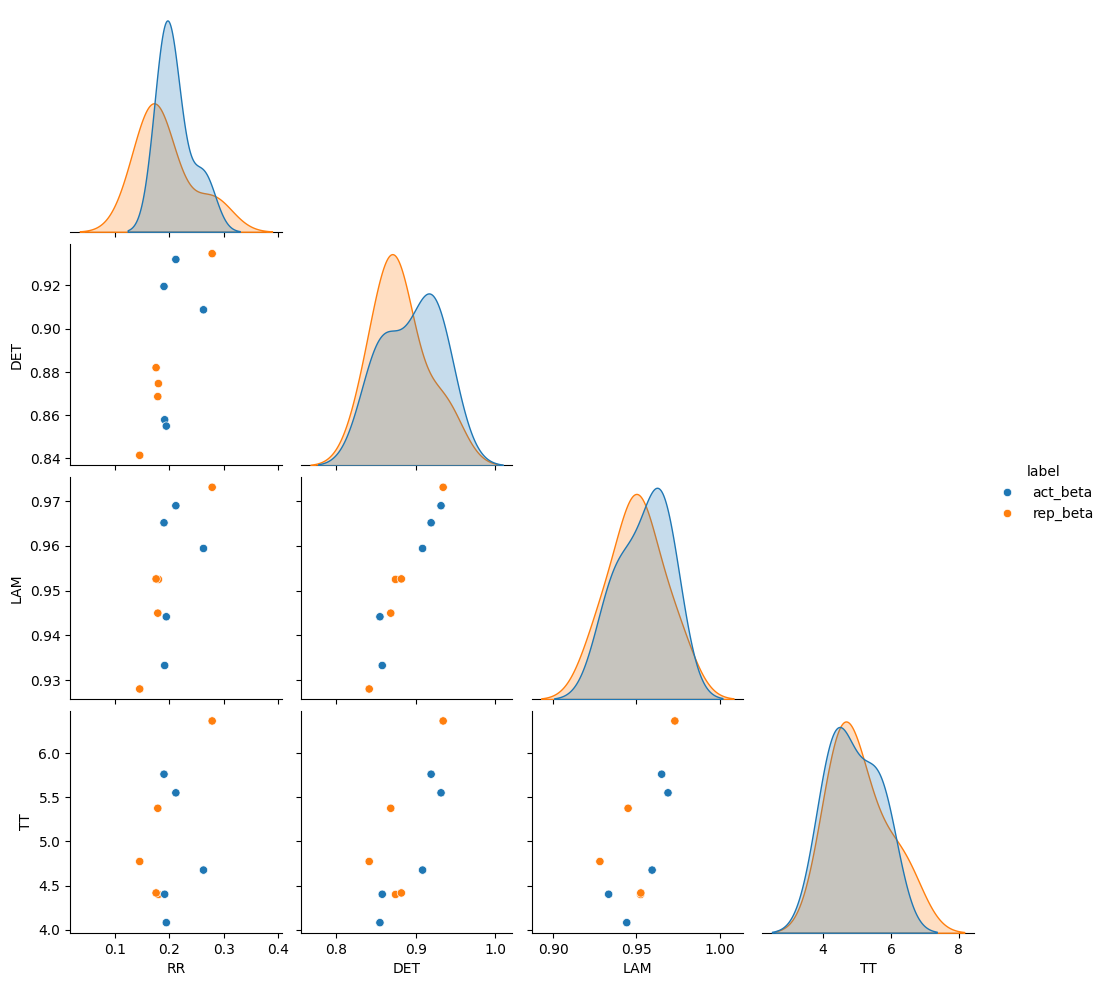

In [114]:
sns.pairplot(df_results_beta, hue='label', corner=True)